<a href="https://colab.research.google.com/github/antreev-brar/ML-projects/blob/master/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving ram_price.csv to ram_price.csv


In [0]:
import io
ram_prices = pd.read_csv(io.BytesIO(uploaded['ram_price.csv']))

In [4]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


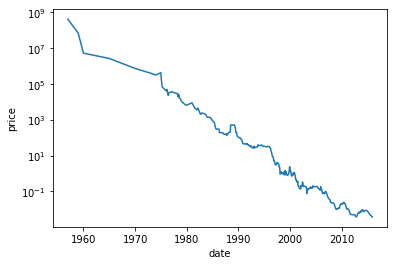

In [9]:
plt.semilogy(ram_prices.date , ram_prices.price)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [0]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.price >=2000]

In [41]:
X_train = data_train.date[: , np.newaxis]
X_train[:10]


array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25]])

In [22]:
y_train = np.log(data_train.price)
y_train

0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
         ...    
197    -0.248461
198    -0.139262
199     0.039221
200     0.292670
201     0.854415
Name: price, Length: 202, dtype: float64

In [0]:
from sklearn.linear_model import LinearRegression
tree = DecisionTreeRegressor().fit(X_train , y_train  )
linear = LinearRegression().fit(X_train , y_train  )
X = ram_prices.date[: , np.newaxis]
DR_pred = tree.predict(X)
LR_pred = linear.predict(X)

price_DR = np.exp(DR_pred)
price_LR = np.exp(LR_pred)

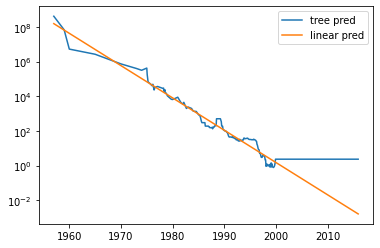

In [39]:
plt.semilogy(ram_prices.date , price_DR         , label = 'tree pred'   )
plt.semilogy(ram_prices.date , price_LR         , label = 'linear pred' )
plt.legend()

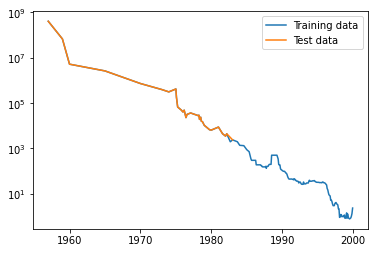

In [40]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.legend()